In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import utils

grader = utils

grader = utils.Grader()

%matplotlib inline

In [2]:
def warmupExercise():
    A = np.eye(5)
    
    return A

In [3]:
warmupExercise()

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [4]:
data = pd.read_csv('Data/ex1data1.txt', header = None)
X,y = data[0], data[1]

m = y.size

In [5]:
m

97

In [6]:
def plotData(x, y):
    fig = plt.figure()
    plt.plot(x, y, 'ro', ms=10, mec = 'k')
    plt.ylabel('Profit in $10, 0000')
    plt.xlabel('Population of city in 10, 0000s')

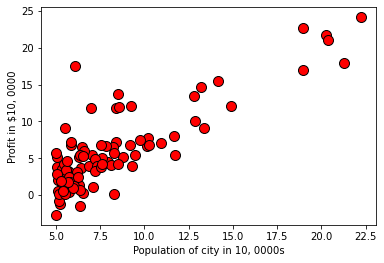

In [7]:
plotData(X, y)

In [8]:
X = np.stack([np.ones(m), X], axis=1)

In [9]:
def computeCost(X, y, theta):
    m = len(y)
    
    r = np.dot(X, theta)

    m = y.size

    J = (1 / (2 * m)) * np.sum(np.square(r - y))

    return J

In [10]:
theta = np.array([0.0, 0.0])
J = computeCost(X, y, theta)
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

theta=np.array([-1, 2])
J = computeCost(X, y, theta)
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [11]:
def gradientDescent(X, y, theta, alpha, num_iters):
     
    m = len(y)

    Theta = theta.copy()
    
    j_history  = []

    for i in range(num_iters):
        
        Theta  = Theta - (alpha/m)*np.dot(np.dot(X, Theta)-y, X)
        
        j_history.append(computeCost(X, y, theta))
        
        
    return Theta , j_history

In [12]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Theta found by gradient descent: -3.6303, 1.1664
Expected theta values (approximately): [-3.6303, 1.1664]


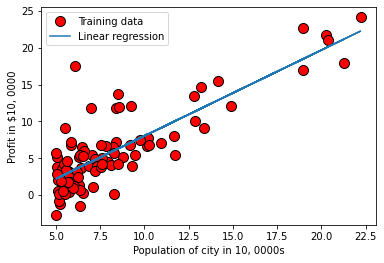

In [13]:
# plot the linear fit
plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);

In [14]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.77

For population = 70,000, we predict a profit of 45342.45



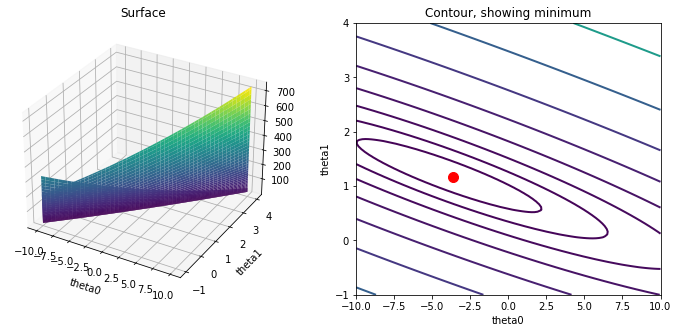

In [15]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
plt.title('Contour, showing minimum')
pass

# Grading
grader[1] = warmupExercise
grader[2] = computeCost
grader[3] = gradientDescent
grader.grade()

In [17]:
# Linear regression with multiple variables
filepath = 'Data/ex1data2.txt'
data2 = pd.read_csv(filepath, header = None)

In [18]:
data2.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [19]:
data2.columns = ['size', 'rooms', 'price']

In [20]:
data2.head()

,size,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [21]:
X2 = data2[data2.columns[:2]]
y2 = data2.price
m  = len(y2)

In [22]:
print('{:>8s}{:>8s}{:>10s}'.format('Size of house', '\tNo. of rooms', '\tprice'))
print('-'*26)
for i in range(10):
    print('{:8.0f}\t{:8.0f}\t{:10.0f}'.format(X2['size'][i], X2['rooms'][i], y2[i]))

Size of house	No. of rooms    	price
--------------------------
    2104	       3	    399900
    1600	       3	    329900
    2400	       3	    369000
    1416	       2	    232000
    3000	       4	    539900
    1985	       4	    299900
    1534	       3	    314900
    1427	       3	    198999
    1380	       3	    212000
    1494	       3	    242500


In [23]:
def featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X-mu) / sigma
    
    return X_norm, mu, sigma

In [24]:
X_norm, mu, sigma = featureNormalize(X2)

print('Computed mean:', mu)
print('Computed standard deviation:', sigma)

Computed mean: size     2000.680851
rooms       3.170213
dtype: float64
Computed standard deviation: size     786.202619
rooms      0.752843
dtype: float64


In [25]:
X_norm.head()

,size,rooms
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205


In [26]:
mu.head()

size     2000.680851
rooms       3.170213
dtype: float64

In [27]:
sigma.head()

size     786.202619
rooms      0.752843
dtype: float64

In [28]:
X2 = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [29]:
def computeCostMulti(X, y, theta):
    m = len(y)
    
    r = np.dot(X, theta)

    m = y.size

    J = (1 / (2 * m)) * np.sum(np.square(r - y))

    return J

In [44]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
     
    m = y.shape[0]

    Theta = theta.copy()
    
    j_history  = []

    for i in range(num_iters):
        
        Theta  = Theta - (alpha/m)*(np.dot(X, Theta)-y).dot(X)
        
        j_history.append(computeCostMulti(X, y, theta))
        
        
    return Theta , j_history

theta computed from gradient descent: [340412.65957447 109447.79558639  -6578.3539709 ]


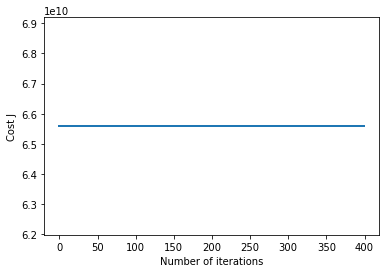

In [46]:
alpha = 0.1
num_iters = 400

# init theta and run gradient descent
theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X2, y2, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')

# Display the gradient descent's result
print('theta computed from gradient descent: {:s}'.format(str(theta)))

# Estimate the price of a 1650 sq-ft, 3 br house
# ======================= YOUR CODE HERE ===========================
# Recall that the first column of X is all-ones. 
# Thus, it does not need to be normalized.

X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta)   # You should change this


In [32]:
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:.0f}'.format(price))

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081


In [47]:
X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma

In [48]:
X_array[1:3]

[-0.4460438603276164, -0.22609336757768828]

In [53]:
# Load data
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [50]:
def normalEqn(X, y):
   
    theta = np.zeros(X.shape[1])
    
    # ===================== YOUR CODE HERE ============================
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    
    # =================================================================
    return theta

In [51]:
theta = normalEqn(X, y);

# Display normal equation's result
print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimate the price of a 1650 sq-ft, 3 br house
# ====================== YOUR CODE HERE ======================

X_array = [1, 1650, 3]
X_array[1:3] = (X_array[1:3] - mu) / sigma
price = np.dot(X_array, theta) # You should change this

# ============================================================

print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $91511


In [52]:
grader[4] = featureNormalize
grader[5] = computeCostMulti
grader[6] = gradientDescentMulti
grader[7] = normalEqn
grader.grade()


Submitting Solutions | Programming Exercise linear-regression



Use token from last successful submission (pawan_k@ee.iitr.ac.in)? (Y/n):  y


                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
                           Warm up exercise |  10 /  10 | Nice work!
          Computing Cost (for one variable) |  40 /  40 | Nice work!
        Gradient Descent (for one variable) |  50 /  50 | Nice work!
                      Feature Normalization |   0 /   0 | Nice work!
    Computing Cost (for multiple variables) |   0 /   0 | Nice work!
  Gradient Descent (for multiple variables) |   0 /   0 | Nice work!
                           Normal Equations |   0 /   0 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  

